<a href="https://colab.research.google.com/github/Can-Bot/DL4-AE/blob/main/2542341T_DL_CW_2024_damages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Damages - Deep Learning Coursework 2024

The aim of this coursework will be for you to design, implement and test a deep learning architecture to detect and identify damage in images. Digitization allows to make historical pictures and art much more widely available to the public. Many such pictures have suffered some form of damage due to time, storage conditions and the fragility of the original medium. For example, the image below (A) shows an example of a digitized parchment that has suffered significant damage over time.

**The aim of this project is for you to design, implement and evaluate a deep learning model to detect and identify damage present in images.**

<table>
<tr>
<td>
<div>
<img src="damage_data/image_path/cljmrkz5n341f07clcujw105j.png" width="500"/>
</div>
</td>
<td>
<div>
<img src="damage_data/annotation_rgb_path/cljmrkz5n341f07clcujw105j.png" width="500"/>
</div>
</td>
</tr>
<td><center>(A) Image</center></td><td><center>(B) damage labels</center></td>
</table>
*(Note that the images will only show once you have downloaded the dataset)*


The image labels in this figure (B) identifies a smatter of peeling paint, a large stained area in the bottom left and a missing part on the top left. Each colour in those images corresponds to a different category of damage, including `fold`, `writing` or `burn marks`. You are provided with a dataset of a variety of damaged images, from Parchment to ceramic or wood painting, and detailed annotations of a range of damages.

You are free to use any architecture you prefer, from what we have seen in class. You can decide to use unsupervised pre-training of only supervised end-to-end training - the approach you choose is your choice.

### Hand-in date: Friday 15th of March before 4:30pm (on Moodle)

### Steps & Hints
* First, look at the data. What are the different type of images (content), what type of material, what type of damage? How different are they? What type of transformations for your data augmentation do you think would be acceptable here?.
* Second, check the provided helper functions for loading the data and separate into training and test set and cross-validation.
* Design a network for the task. What output? What layers? How many? Do you want to use an Autoencoder for unsupervised pre-training?
* Choose a loss function for your network
* Select optimiser and training parameters (batch size, learning rate)
* Optimise your model, and tune hyperparameters (especially learning rate, momentum etc)
* Analyse the results on the test data. How to measure success? Which classes are recognised well, which are not? Is there confusion between some classes? Look at failure cases.
* If time allows, go back to drawing board and try a more complex, or better, model.
* Explain your thought process, justify your choices and discuss the results!

### Submission
* submit ONE zip file on Moodle containing:
  * **your notebook**: use `File -> download .ipynb` to download the notebook file locally from colab.
  * **a PDF file** of your notebook's output as you see it: use `File -> print` to generate a PDF.
* your notebook must clearly contains separate cells for:
  * setting up your model and data loader
  * training your model from data
  * loading your pretrained model from github/gitlab/any other online storage you like!
  * testing your model on test data.
* The training cells must be disabled by a flag, such that when running *run all* on your notebook it does
  * load the data
  * load your model
  * apply the model to the test data
  * analyse and display the results and accuracy
* In addition provide markup cell:
  * containing your student number at the top
  * to describe and motivate your design choices: architecture, pre-processing, training regime
  * to analyse, describe and comment on your results
  * to provide some discussion on what you think are the limitations of your solution and what could be future work

* **Note that you must put your trained model online so that your code can download it.**


### Assessment criteria
* In order to get a pass mark, you will need to demonstrate that you have designed and trained a deep NN to solve the problem, using sensible approach and reasonable efforts to tune hyper-parameters. You have analysed the results. It is NOT necessary to have any level of accuracy (a network that predicts poorly will always yield a pass mark if it is designed, tuned and analysed sensibly).
* In order to get a good mark, you will show good understanding of the approach and provide a working solution.
* in order to get a high mark, you will demonstrate a working approach of gradual improvement between different versions of your solution.
* bonus marks for attempting something original if well motivated - even if it does not yield increased performance.
* bonus marks for getting high performance, and some more points are to grab for getting the best performance in the class.

### Notes
* You are provided code to isolate the test set and cross validation, make sure to keep the separation clean to ensure proper setting of all hyperparameters.
* I recommend to start with small models that can be easier to train to set a baseline performance before attempting more complex one.
* Be mindful of the time!

## Housekeeping

In [1]:
!pip install gdown pytorch_lightning
!pip3 install ax-platform

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 801.6/801.6 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.4/840.4 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━

In [2]:


import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

import pytorch_lightning as pl
from pytorch_lightning.loggers import WandbLogger
from pytorch_lightning.callbacks import LearningRateMonitor, ModelCheckpoint

import os
import pandas as pd
import PIL
PIL.Image.MAX_IMAGE_PIXELS = 243748701
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import gdown
import shutil

DEVICE = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")

# Load dataset

We then load the metadata in a dataframe for convenience

In [3]:
!pwd

/content


In [4]:
!gdown 1v8aUId0-tTW3ln3O2BE4XajQeCToOEiS -O damages.zip

Downloading...
From (original): https://drive.google.com/uc?id=1v8aUId0-tTW3ln3O2BE4XajQeCToOEiS
From (redirected): https://drive.google.com/uc?id=1v8aUId0-tTW3ln3O2BE4XajQeCToOEiS&confirm=t&uuid=75ec211b-4e03-4c9f-9256-cdfae0dce93b
To: /content/damages.zip
100% 3.32G/3.32G [00:32<00:00, 101MB/s]


In [5]:
!ln -s /content/drive/MyDrive/damage_data

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# set  that to wherever you want to store the data (eg, your Google Drive), choose a persistent location!
root_dir = '/content/'
data_dir = os.path.join(root_dir, "damage_data")
csv_path = os.path.join(data_dir, 'metadata.csv')
drive_backup_dir = "/content/drive/MyDrive/damage_data"

try:
    df = pd.read_csv(csv_path)

except:  # if the dataset has not been downloaded yet, do it.
    print("error:", e)
    zip_path = os.path.join(root_dir, 'damages.zip')
    gdown.download(id='1v8aUId0-tTW3ln3O2BE4XajQeCToOEiS', output=zip_path)
    shutil.unpack_archive(zip_path, root_dir)
    df = pd.read_csv(csv_path)

This dataframe has the paths of where the dataset images and annotation labels are stored, plus classification labels.

In [8]:
df

id   material             content  \
0    cljmrkz5n341f07clcujw105j  Parchment  Artistic depiction   
1    cljmrkz5n341n07clf1u410ed  Parchment  Artistic depiction   
2    cljmrkz5n341r07clhl93dpre  Parchment  Artistic depiction   
3    cljmrkz5n341v07cl2gfhd6zj  Parchment  Artistic depiction   
4    cljmrkz5n341z07cldbn01un3  Parchment  Artistic depiction   
..                         ...        ...                 ...   
390  clnofow7i00n2076ubpfodf4d       Wood  Artistic depiction   
391  clnrm7fvu092q07840tq9zs03       Wood  Artistic depiction   
392  clnrm7fvu092r0784a6p2m5li       Wood  Artistic depiction   
393  clnrm7fvu092s0784tgwccewe       Wood  Artistic depiction   
394  clnrm7fvu092t0784ltljhiu0       Wood  Artistic depiction   

                                            image_path  \
0    ./damage_data/image_path/cljmrkz5n341f07clcujw...   
1    ./damage_data/image_path/cljmrkz5n341n07clf1u4...   
2    ./damage_data/image_path/cljmrkz5n341r07clhl93...   
3    ./damage_data/image_path/cljmrkz5n341v07cl2gfh...   
4    ./damage_data/image_path/cljmrkz5n341z07cldbn0...   
..                                                 ...   
390  ./damage_data/image_path/clnofow7i00n2076ubpfo...   
391  ./damage_data/image_path/clnrm7fvu092q07840tq9...   
392  ./damage_data/image_path/clnrm7fvu092r0784a6p2...   
393  ./damage_data/image_path/clnrm7fvu092s0784tgwc...   
394  ./damage_data/image_path/clnrm7fvu092t0784ltlj...   

                                       annotation_path  \
0    ./damage_data/annotation_path/cljmrkz5n341f07c...   
1    ./damage_data/annotation_path/cljmrkz5n341n07c...   
2    ./damage_data/annotation_path/cljmrkz5n341r07c...   
3    ./damage_data/annotation_path/cljmrkz5n341v07c...   
4    ./damage_data/annotation_path/cljmrkz5n341z07c...   
..                                                 ...   
390  ./damage_data/annotation_path/clnofow7i00n2076...   
391  ./damage_data/annotation_path/clnrm7fvu092q078...   
392  ./damage_data/annotation_path/clnrm7fvu092r078...   
393  ./damage_data/annotation_path/clnrm7fvu092s078...   
394  ./damage_data/annotation_path/clnrm7fvu092t078...   

                                   annotation_rgb_path  
0    ./damage_data/annotation_rgb_path/cljmrkz5n341...  
1    ./damage_data/annotation_rgb_path/cljmrkz5n341...  
2    ./damage_data/annotation_rgb_path/cljmrkz5n341...  
3    ./damage_data/annotation_rgb_path/cljmrkz5n341...  
4    ./damage_data/annotation_rgb_path/cljmrkz5n341...  
..                                                 ...  
390  ./damage_data/annotation_rgb_path/clnofow7i00n...  
391  ./damage_data/annotation_rgb_path/clnrm7fvu092...  
392  ./damage_data/annotation_rgb_path/clnrm7fvu092...  
393  ./damage_data/annotation_rgb_path/clnrm7fvu092...  
394  ./damage_data/annotation_rgb_path/clnrm7fvu092...  

[395 rows x 6 columns]

The images in the dataset are categorised in terms of the type of `material`, meaning what was the original picture on, eg, Parchment, Glass or Textile.

In [9]:
df['material'].unique()

array(['Parchment', 'Film emulsion', 'Glass', 'Paper', 'Tesserae',
       'Canvas', 'Textile', 'Ceramic', 'Wood'], dtype=object)

Moreover, images are also categorised in terms on the `content` of the image, meaning what is depicted: eg, Line art, geometric patterns, etc.

In [10]:
df['content'].unique()

array(['Artistic depiction', 'Line art', 'Photographic depiction',
       'Geometric patterns'], dtype=object)

## Labels
Segmentation labels are saved as a PNG image, where each number from 1 to 15 corresponds to a damage class like Peel, Scratch etc; the Background class is set to 255, and the Clean class (no damage) is set to 0. We also provide code to convert these annotation values to RGB colours for nicer visualisation, but for training you should use the original annotations.

In [11]:
name_color_mapping = {
    "Material loss": "#1CE6FF",
    "Peel": "#FF34FF",
    "Dust": "#FF4A46",
    "Scratch": "#008941",
    "Hair": "#006FA6",
    "Dirt": "#A30059",
    "Fold": "#FFA500",
    "Writing": "#7A4900",
    "Cracks": "#0000A6",
    "Staining": "#63FFAC",
    "Stamp": "#004D43",
    "Sticker": "#8FB0FF",
    "Puncture": "#997D87",
    "Background": "#5A0007",
    "Burn marks": "#809693",
    "Lightleak": "#f6ff1b",
}

class_names = [ 'Material loss', 'Peel', 'Dust', 'Scratch',
                'Hair', 'Dirt', 'Fold', 'Writing', 'Cracks', 'Staining', 'Stamp',
                'Sticker', 'Puncture', 'Burn marks', 'Lightleak', 'Background']

class_to_id = {class_name: idx+1 for idx, class_name in enumerate(class_names)}
class_to_id['Background'] = 255  # Set the Background ID to 255

def hex_to_rgb(hex_color: str) -> tuple:
    hex_color = hex_color.lstrip('#')
    return tuple(int(hex_color[i:i+2], 16) for i in (0, 2, 4))

id_to_rgb = {class_to_id[class_name]: hex_to_rgb(color) for class_name, color in name_color_mapping.items()}
id_to_rgb[0] = (0,0,0)

# Create id2label mapping: ID to class name
id2label = {idx: class_name for class_name, idx in class_to_id.items()}

# Create label2id mapping: class name to ID, which is the same as class_to_id
label2id = class_to_id

# Non-damaged pixels
id2label[0] = 'Clean'
label2id['Clean'] = 0

In [12]:
print(id2label)

{1: 'Material loss', 2: 'Peel', 3: 'Dust', 4: 'Scratch', 5: 'Hair', 6: 'Dirt', 7: 'Fold', 8: 'Writing', 9: 'Cracks', 10: 'Staining', 11: 'Stamp', 12: 'Sticker', 13: 'Puncture', 14: 'Burn marks', 15: 'Lightleak', 255: 'Background', 0: 'Clean'}


In [13]:
from IPython.display import Markdown

legend='#### Colour labels for each damage type\n'
for damage in class_names:
    legend += '- <span style="color: {color}">{damage}</span>.\n'.format(color=name_color_mapping[damage], damage=damage)
display(Markdown(legend))

#### Colour labels for each damage type
- <span style="color: #1CE6FF">Material loss</span>.
- <span style="color: #FF34FF">Peel</span>.
- <span style="color: #FF4A46">Dust</span>.
- <span style="color: #008941">Scratch</span>.
- <span style="color: #006FA6">Hair</span>.
- <span style="color: #A30059">Dirt</span>.
- <span style="color: #FFA500">Fold</span>.
- <span style="color: #7A4900">Writing</span>.
- <span style="color: #0000A6">Cracks</span>.
- <span style="color: #63FFAC">Staining</span>.
- <span style="color: #004D43">Stamp</span>.
- <span style="color: #8FB0FF">Sticker</span>.
- <span style="color: #997D87">Puncture</span>.
- <span style="color: #809693">Burn marks</span>.
- <span style="color: #f6ff1b">Lightleak</span>.
- <span style="color: #5A0007">Background</span>.


## Create dataset splits

Here is an example of how to split the dataset for Leave-one-out cross validation (LOOCV) based on material.

In [14]:
def create_leave_one_out_splits(df, criterion='material'):

    grouped = df.groupby(criterion)
    content_splits = {name: group for name, group in grouped}
    unique_val = df[criterion].unique()

    # Initialize a dictionary to hold the train and validation sets for each LOOCV iteration
    loocv_splits = {}

    for value in unique_val:
        # Create the validation set
        val_set = content_splits[value]

        # Create the training set
        train_set = pd.concat([content_splits[c] for c in unique_val if c != value])

        # Add these to the loocv_splits dictionary
        loocv_splits[value] = {'train_set': train_set, 'val_set': val_set}

    return loocv_splits


For this coursework, we will want to assess the generalisation of the method, so for that we will keep one type of material (`Canvas`) as test set, and only train on the remaining ones.

In [15]:
# split the dataset according to material type
full_splits = create_leave_one_out_splits(df, 'material')

# use Canvas as test set
test_set = full_splits['Canvas']['val_set']

# use the rest as training set
train_set = full_splits['Canvas']['train_set']

# prepare a leave-one-out cross validation for the training set
loocv_splits = create_leave_one_out_splits(train_set, 'material')

# identify the different type of image content
unique_material = train_set['material'].unique()
print(unique_material)


['Parchment' 'Film emulsion' 'Glass' 'Paper' 'Tesserae' 'Textile'
 'Ceramic' 'Wood']


To help you, here are some helper functions to help crop and process images.

In [16]:
def random_square_crop_params(image, target_size):
    width, height = image.size
    min_edge = min(width, height)

    # Conditionally set the range for random crop size
    lower_bound = min(min_edge, target_size)
    upper_bound = max(min_edge, target_size)

    # Generate crop_size
    crop_size = random.randint(lower_bound, upper_bound)

    # Check and adjust if crop_size is larger than any dimension of the image
    if crop_size > width or crop_size > height:
        crop_size = min(width, height)

    # Generate random coordinates for the top-left corner of the crop
    x = random.randint(0, width - crop_size)
    y = random.randint(0, height - crop_size)

    return (x, y, x + crop_size, y + crop_size)

def apply_crop_and_resize(image, coords, target_size):
    image_crop = image.crop(coords)
    image_crop = image_crop.resize((target_size, target_size), Image.NEAREST)
    return image_crop

We also provide a simple class for holding the dataset

In [17]:
import torch
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
import random
import numpy as np
from PIL import Image

from torchvision import transforms

class CustomDataset(Dataset):
    def __init__(self, dataframe, target_size, is_train=True):
        self.dataframe = dataframe
        self.target_size = target_size
        self.is_train = is_train

        self.to_tensor = transforms.ToTensor()

        # Define the normalization transform
        self.normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                              std=[0.229, 0.224, 0.225])

    def __len__(self):
            return len(self.dataframe)

    def __getitem__(self, idx):
        row = self.dataframe.iloc[idx]
        image = Image.open(row['image_path']).convert('RGB')
        annotation = Image.open(row['annotation_path']).convert('L')
        annotation_rgb = Image.open(row['annotation_rgb_path']).convert('RGB')
        id = row['id']
        material = row['material']
        content = row['content']

        if self.is_train:
            # Generate random square cropping coordinates
            crop_coords = random_square_crop_params(image, self.target_size)

            # Apply the same cropping and resizing to all
            image = apply_crop_and_resize(image, crop_coords, self.target_size)
            annotation = apply_crop_and_resize(annotation, crop_coords, self.target_size)
            annotation_rgb = apply_crop_and_resize(annotation_rgb, crop_coords, self.target_size)
        else:  # Validation
            # Instead of cropping, downsize the images so that the longest edge is 1024 or less
            max_edge = max(image.size)
            if max_edge > 1024:
                downsample_ratio = 1024 / max_edge
                new_size = tuple([int(dim * downsample_ratio) for dim in image.size])

                image = image.resize(new_size, Image.BILINEAR)
                annotation = annotation.resize(new_size, Image.NEAREST)
                annotation_rgb = annotation_rgb.resize(new_size, Image.BILINEAR)

        # Convert PIL images to PyTorch tensors
        image = self.to_tensor(image)
        annotation = torch.tensor(np.array(annotation), dtype=torch.long)
        annotation_rgb = self.to_tensor(annotation_rgb)

        # Normalize the image
        image = self.normalize(image)

        return {
            'image': image,
            'annotation': annotation,
            'annotation_rgb': annotation_rgb,
            'id': id,
            'material': material,
            'content': content
        }

Here we create a DataModule which encapsulates our training and validation DataLoaders; you can also do this manually by only using the Pytorch DataLoader class, lines 24 and 27.

In [18]:
from torch.utils.data import DataLoader

class CustomDataModule(pl.LightningDataModule):
    def __init__(self, loocv_splits, current_material, target_size, batch_size=32, num_workers=4):
        super().__init__()
        self.loocv_splits = loocv_splits
        self.current_material = current_material
        self.target_size = target_size
        self.batch_size = batch_size
        self.num_workers = num_workers

    def prepare_data(self):
        pass

    def setup(self, stage=None):
        # Load current train and validation set based on LOOCV iteration
        train_df = self.loocv_splits[self.current_material]['train_set']
        val_df = self.loocv_splits[self.current_material]['val_set'].sample(frac=1).reset_index(drop=True)

        self.train_dataset = CustomDataset(dataframe=train_df, target_size=self.target_size, is_train=True)
        self.val_dataset = CustomDataset(dataframe=val_df, target_size=self.target_size, is_train=False)

    def train_dataloader(self):
        return DataLoader(self.train_dataset, batch_size=self.batch_size, shuffle=True, num_workers=self.num_workers)

    def val_dataloader(self):
        return DataLoader(self.val_dataset, batch_size=1, shuffle=False, num_workers=self.num_workers)

    def test_dataloader(self):
        pass


The following will create a data module for validating on the first content in the list (`Parchment`) and training on all the other types of material (you will want to do that for each fold).

In [19]:
data_module = CustomDataModule(loocv_splits=loocv_splits,
                               current_material=unique_material[0],
                               target_size=512,
                               batch_size=4)

Finally, we can get the train and validation data loaders from the data module.

In [20]:
data_module.setup()
train_loader = data_module.train_dataloader()
val_loader = data_module.val_dataloader()

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


# Dataset visualisation

We need to denormalise the images so we can display them

In [21]:
# Mean and std used for normalization
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

def denormalize(image, mean = [0.485, 0.456, 0.406], std = [0.229, 0.224, 0.225]):
    img_cpy = image.copy()
    for i in range(3):
        img_cpy[..., i] = img_cpy[..., i] * std[i] + mean[i]
    return img_cpy

## Visualise training samples
Random square crops of the images and correspoding RGB annotations on their own and overlaid onto the image.

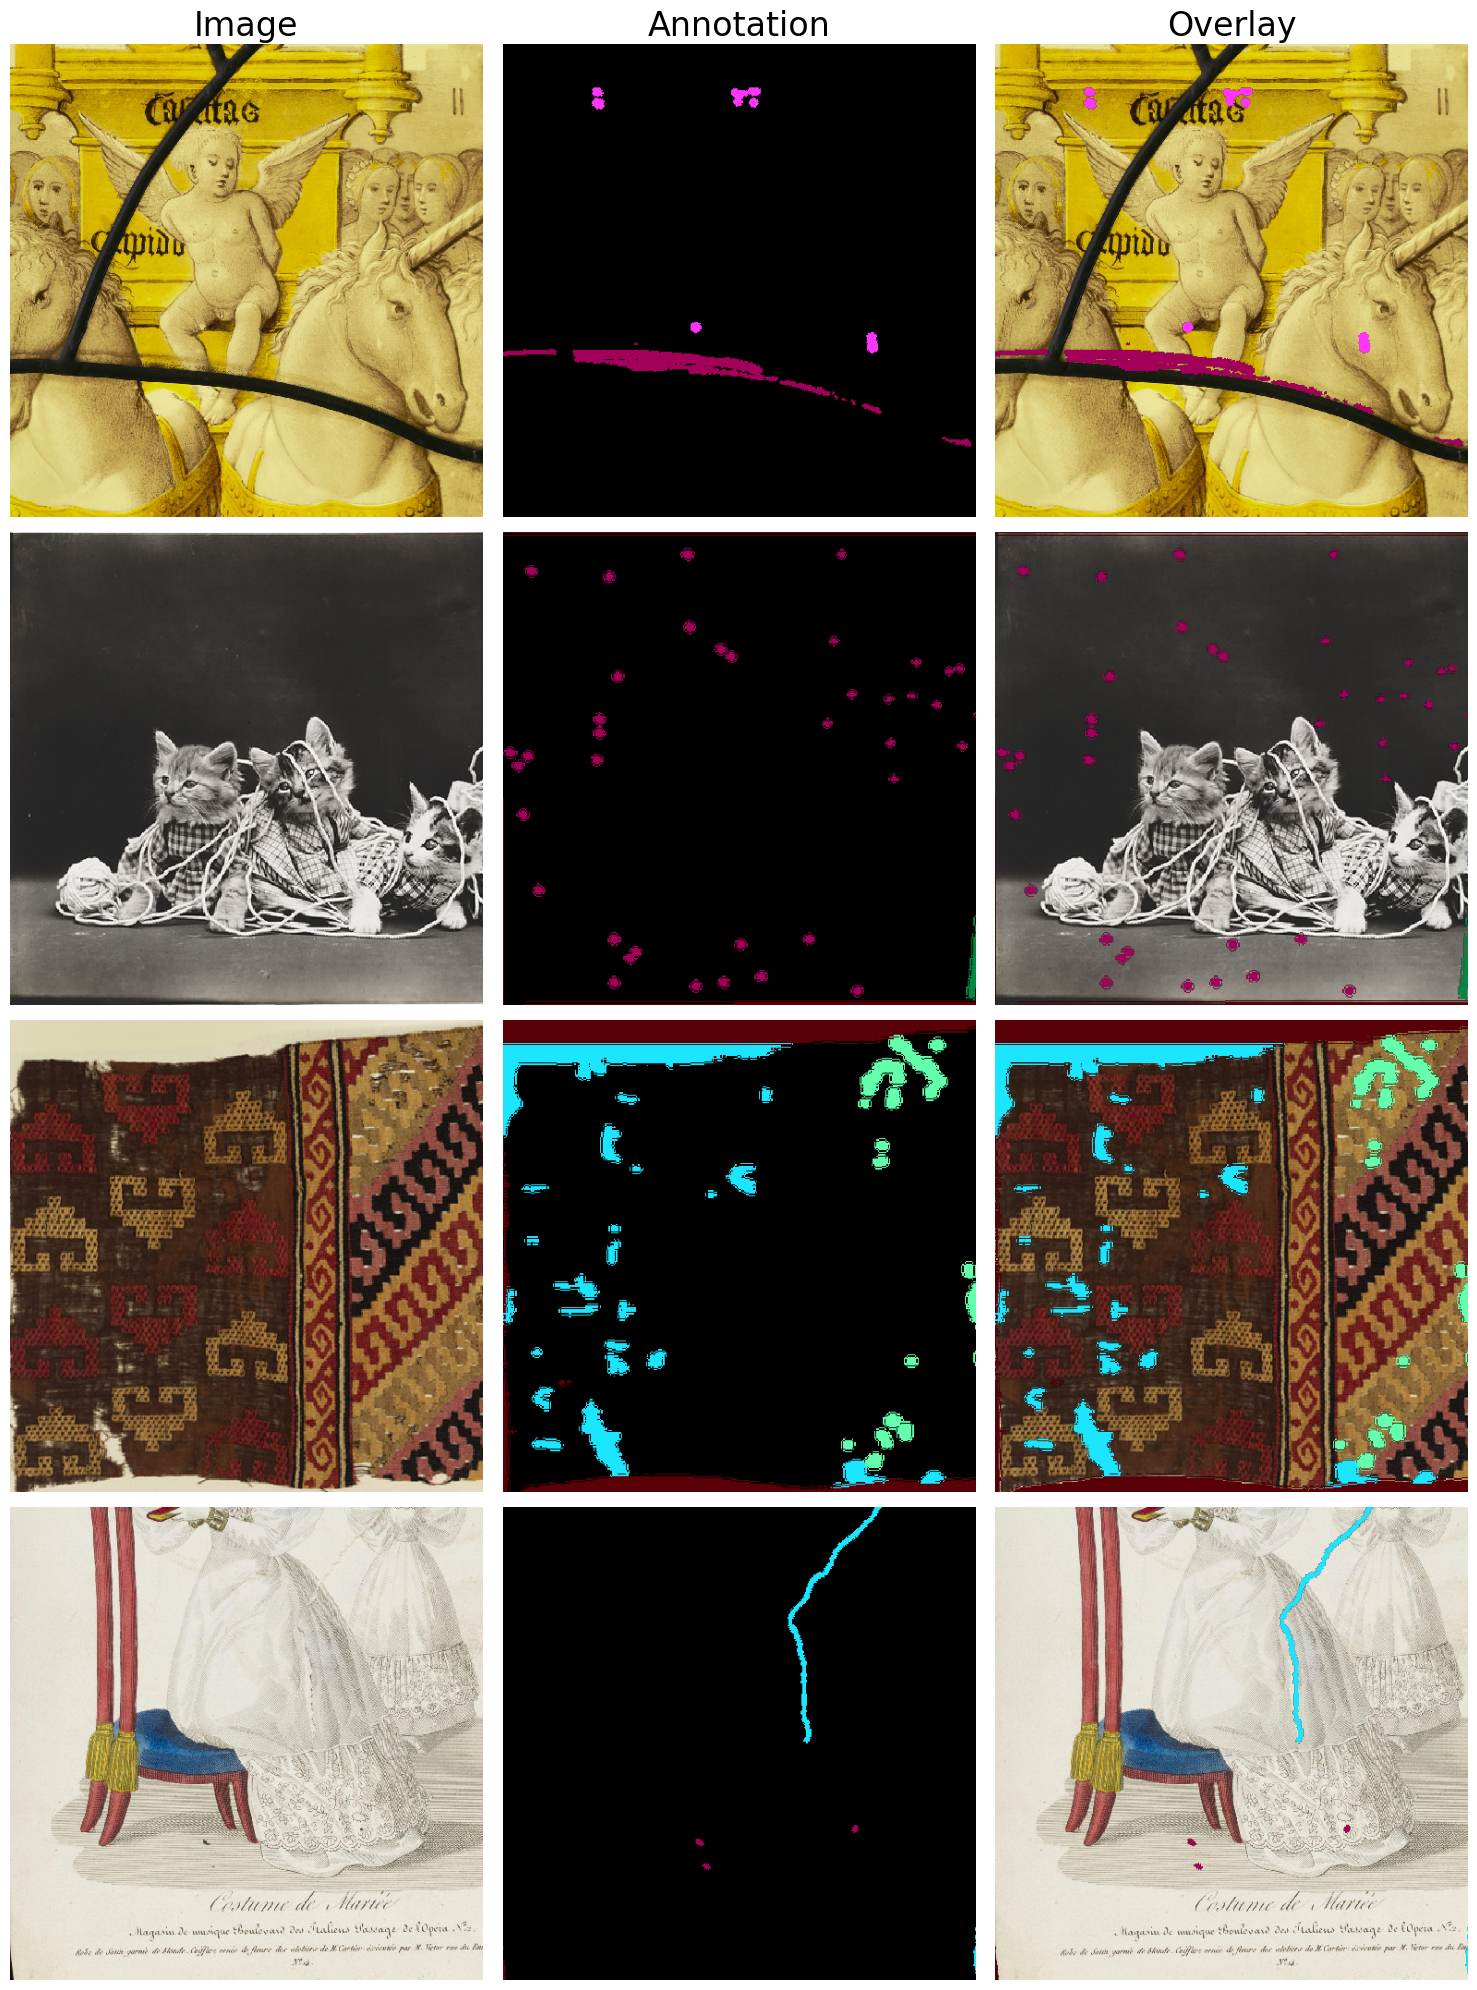

In [22]:
example_batch = next(iter(train_loader))

example_images = example_batch['image']
example_annotations = example_batch['annotation']
example_annotation_rgbs = example_batch['annotation_rgb']

# Number of examples to visualize
N = min(4, len(example_images))

fig, axes = plt.subplots(N, 3, figsize=(15, 5 * N))

for ax, col in zip(axes[0], ['Image', 'Annotation', 'Overlay']):
    ax.set_title(col, fontsize=24)

for i in range(N):
    example_image = denormalize(example_images[i].numpy().transpose((1, 2, 0)), mean, std)  # C, H, W -> H, W, C
    example_annotation = Image.fromarray(np.uint8(example_annotations[i].numpy()), 'L')
    example_annotation_rgb = example_annotation_rgbs[i].numpy().transpose((1, 2, 0))  # C, H, W -> H, W, C

    # Create an alpha (transparency) channel where black pixels in annotation_rgb are fully transparent
    alpha_channel = np.all(example_annotation_rgb == [0, 0, 0], axis=-1)
    example_annotation_rgba = np.dstack((example_annotation_rgb, np.where(alpha_channel, 0, 1)))

    axes[i, 0].imshow(example_image)
    axes[i, 0].axis('off')

    #axes[i, 1].imshow(example_annotation, cmap='gray', vmin=0, vmax=255)
    axes[i, 1].imshow(example_annotation_rgb)
    axes[i, 1].axis('off')

    axes[i, 2].imshow(example_image)
    axes[i, 2].imshow(example_annotation_rgba)
    axes[i, 2].axis('off')

plt.tight_layout()
#plt.show()

Visualising the validation set, which loads the left-out class as whole images.

(497, 512, 3)
(1024, 883, 3)
(1024, 1010, 3)
(1024, 887, 3)


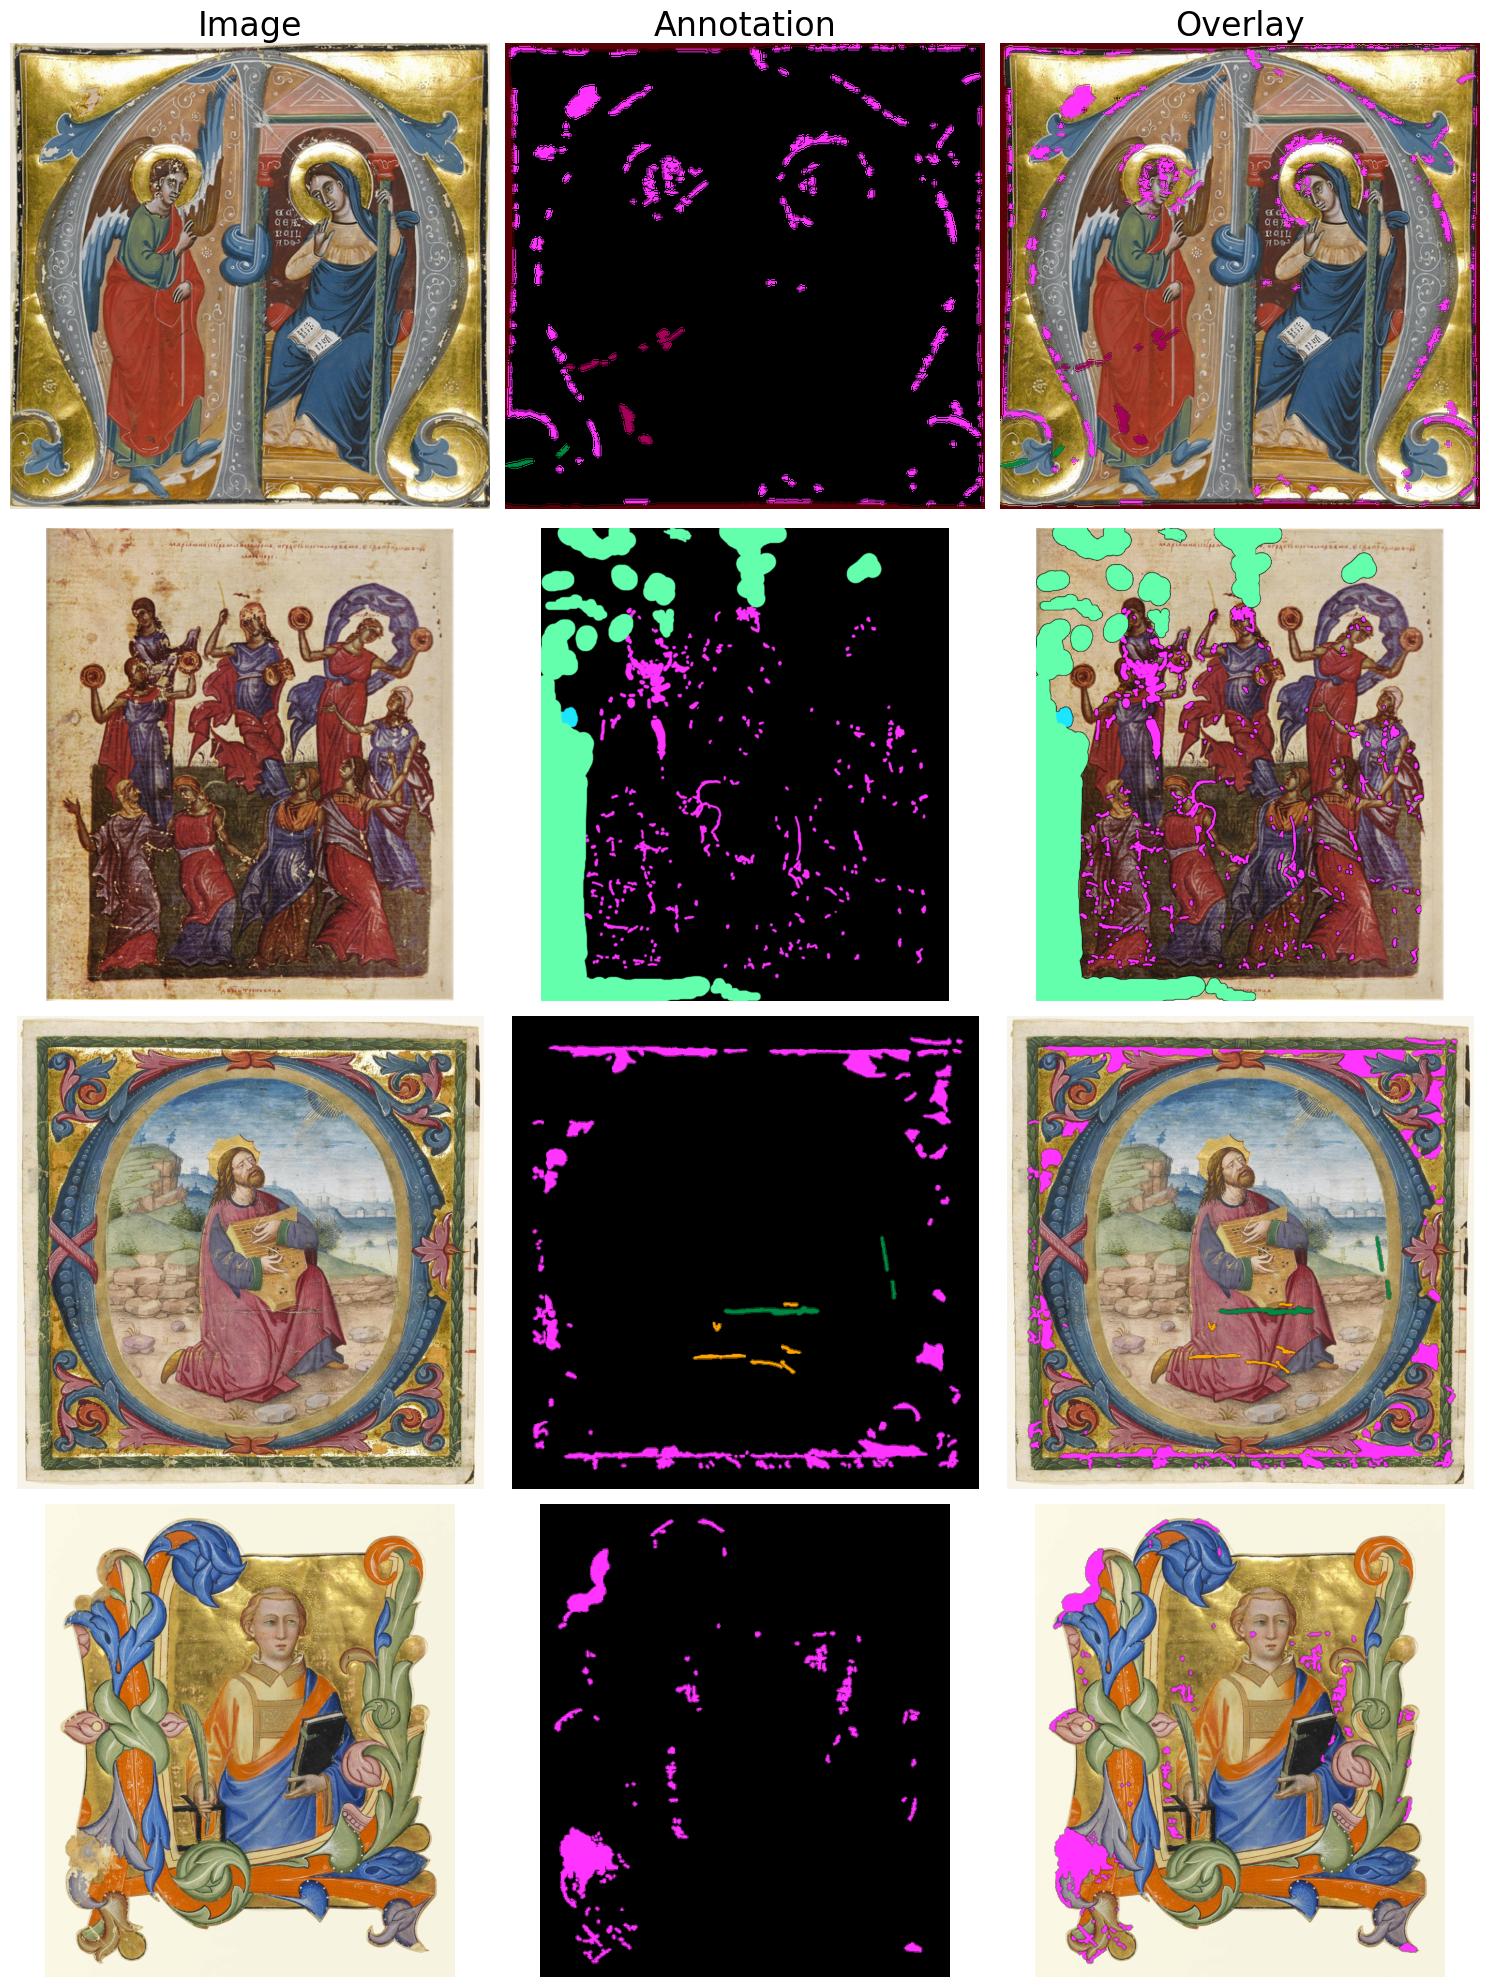

In [23]:
val_iter = iter(val_loader)
example_batches = [next(val_iter) for _ in range(4)]

# Initialize empty lists to collect different parts of each batch
example_images = []
example_annotations = []
example_annotation_rgbs = []
example_materials = []
example_contents = []

# Populate the lists with the data from the 4 batches
for batch in example_batches:
    example_images.append(batch['image'].squeeze())
    example_annotations.append(batch['annotation'].squeeze())
    example_annotation_rgbs.append(batch['annotation_rgb'].squeeze())
    example_materials.append(batch['material'][0])
    example_contents.append(batch['content'][0])

# Number of examples to visualize
N = min(4, len(example_images))

fig, axes = plt.subplots(N, 3, figsize=(15, 5 * N))

for ax, col in zip(axes[0], ['Image', 'Annotation', 'Overlay']):
    ax.set_title(col, fontsize=24)

for i in range(N):
    example_image = denormalize(example_images[i].numpy().transpose((1, 2, 0)), mean, std)  # C, H, W -> H, W, C
    print(example_image.shape)
    example_annotation = example_annotations[i].numpy()
    example_annotation_rgb = example_annotation_rgbs[i].numpy().transpose((1, 2, 0))  # C, H, W -> H, W, C
    example_material = example_materials[i]
    example_content = example_contents[i]
    # Create an alpha (transparency) channel where black pixels in annotation_rgb are fully transparent
    alpha_channel = np.all(example_annotation_rgb == [0, 0, 0], axis=-1)
    example_annotation_rgba = np.dstack((example_annotation_rgb, np.where(alpha_channel, 0, 1)))
    axes[i, 0].imshow(example_image)
    axes[i, 0].axis('off')

    axes[i, 1].imshow(example_annotation_rgb)
    axes[i, 1].axis('off')

    axes[i, 2].imshow(example_image)
    axes[i, 2].imshow(example_annotation_rgba)
    axes[i, 2].axis('off')

plt.tight_layout()
plt.show()

In [24]:
train_loader = data_module.train_dataloader()
valid_loader = data_module.val_dataloader()

# 1) Understanding the dataset

## What is the data?
The dataset provided for this task consists of a diverse collection of images depicting various forms of damage, including but not limited to damage types such as scratches, tears, stains, and folds, found across different materials such as parchment, ceramics, and wood paintings. Each image in the dataset is accompanied by detailed annotations, providing information about the location and type of damage present in the image. These annotations serve as* ground truth labels* for training and evaluating the deep learning model.

##Pre-processing
Before training the model, preprocessing steps need to be applied to the dataset. This includes standardizing the size and format of the images, ensuring consistency in labeling and annotation formats, and performing data augmentation techniques such as random cropping, rotation, and flipping to increase the diversity and robustness of the training data. Luckily standardisation is already applied to the dataset.

## Further Processing
 Additionally, the dataset may need to be split into training, validation, and test sets to facilitate model training and evaluation while ensuring proper generalization to unseen data. By carefully preprocessing the dataset, we can enhance the model's ability to effectively learn and recognize different types of damage in images.

# 2) Picking a Model

## Supervised or Unsupervised?

I believe supervised learning is more suitable for the task of damage detection and identification in images due to the availability of annotated data, which provides explicit labels for the different types of damages present in the images. In supervised learning, the model learns to map input images to corresponding output labels by minimizing a predefined loss function, leveraging the ground truth annotations during training. This allows the model to capture complex patterns and relationships between image features and damage types, ultimately enabling it to make accurate predictions on unseen data. On the other hand, unsupervised learning, while powerful in discovering underlying structures in data without explicit labels, may not be directly applicable here as it relies on the absence of labeled data and may not effectively capture the nuances of damage types without explicit supervision. Therefore, supervised learning is a more suitable approach for this task, facilitating the creation of a robust damage detection and identification system.

## Picking architecture

For a image classification task, an appropriate segmentation model should be picked. The models considered were:

**Simple SegmentationModel:** The SegmentationModel architecture integrates convolutional layers, max-pooling operations, and upsampling layers to capture local and global features efficiently. With ReLU activation functions, it promotes rapid convergence during training, enabling effective learning of complex patterns. Its simplicity and flexibility make it suitable for diverse segmentation tasks across domains, offering a balanced mix of computational efficiency and performance.

**U-Net:** U-Net is a popular architecture for semantic segmentation, especially when dealing with medical image segmentation tasks. It consists of a contracting path (encoder) followed by an expansive path (decoder), which helps to capture both local and global context information effectively.

**SegNet:** SegNet is an encoder-decoder architecture designed for semantic segmentation. It consists of convolutional and pooling layers in the encoder followed by upsampling and convolutional layers in the decoder to generate the segmentation map.

**HRNet (High-Resolution Network):** HRNet is designed to maintain high-resolution representations throughout the network by using parallel multi-scale fusion. It preserves fine-grained details while capturing global context, leading to more accurate segmentation results.



In [32]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from sklearn.model_selection import train_test_split


class SegmentationModel(nn.Module):
    def __init__(self, num_channels):
        super(SegmentationModel, self).__init__()
        # Define your model architecture here
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(64, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, num_channels, kernel_size=3, padding=1)
        # Add a max pooling layer to reduce spatial dimensions
        self.max_pool = nn.MaxPool2d(kernel_size=2, stride=2)
        # Add upsampling layers
        self.upsample1 = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)
        self.upsample2 = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)

    def forward(self, x):
        x = self.upsample1(x)
        x = F.relu(self.conv1(x))
        x = self.max_pool(x)

        x = self.upsample2(x)
        x = F.relu(self.conv2(x))
        x = self.max_pool(x)

        x = self.conv3(x)
        return x


In [ ]:
class SegNet(nn.Module):
    def __init__(self, num_classes):
        super(SegNet, self).__init__()
        # Encoder layers
        self.encoder_conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        self.encoder_conv2 = nn.Conv2d(64, 64, kernel_size=3, padding=1)
        self.encoder_conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.encoder_conv4 = nn.Conv2d(128, 128, kernel_size=3, padding=1)

        # Max pooling layers with indices for pooling
        self.max_pool = nn.MaxPool2d(kernel_size=2, stride=2, return_indices=True)

        # Decoder layers with upsampling using pooling indices
        self.decoder_conv1 = nn.Conv2d(128, 128, kernel_size=3, padding=1)
        self.decoder_conv2 = nn.Conv2d(128, 64, kernel_size=3, padding=1)
        self.decoder_conv3 = nn.Conv2d(64, num_classes, kernel_size=3, padding=1)

        self.unpool = nn.MaxUnpool2d(kernel_size=2, stride=2)

    def forward(self, x):
        # Encoder
        x, indices1 = self.max_pool(F.relu(self.encoder_conv1(x)))
        x, indices2 = self.max_pool(F.relu(self.encoder_conv2(x)))
        x, indices3 = self.max_pool(F.relu(self.encoder_conv3(x)))
        x, indices4 = self.max_pool(F.relu(self.encoder_conv4(x)))

        # Decoder with upsampling using pooling indices
        x = F.relu(self.decoder_conv1(self.unpool(x, indices4)))
        x = F.relu(self.decoder_conv2(self.unpool(x, indices3)))
        x = self.decoder_conv3(self.unpool(x, indices2))  # No activation for output

        return x


In [ ]:
from torch.utils.tensorboard import SummaryWriter

# Initialize TensorBoard writer
writer = SummaryWriter()

# Define data loaders
train_loader = data_module.train_dataloader()
valid_loader = data_module.val_dataloader()

# Initialize the model
num_classes = len(class_names)
model = SegmentationModel(3)

# Define loss function and optimizer
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    print("Epoch: ", epoch)
    model.train()
    train_loss = 0.0
    for batch_idx, batch in enumerate(train_loader):
        inputs, targets = batch['image'], batch['annotation_rgb']

        # Forward pass
        outputs = model(inputs)

        # Apply softmax activation along the channel dimension
        outputs_softmax = F.softmax(outputs, dim=1)

        # Compute loss
        loss = loss_function(outputs_softmax, targets)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Accumulate training loss
        train_loss += loss.item()

    # Compute average training loss
    train_loss /= len(train_loader)

    # Log training loss
    writer.add_scalar('Loss/train', train_loss, epoch)

    # Validation loop
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for batch_idx, batch in enumerate(val_loader):
            inputs, targets = batch['image'], batch['annotation_rgb']

            # Forward pass
            outputs = model(inputs)

            # Compute validation loss
            loss = loss_function(outputs, targets)

            # Accumulate validation loss
            val_loss += loss.item()

    # Compute average validation loss
    val_loss /= len(val_loader)

    # Log validation loss
    writer.add_scalar('Loss/val', val_loss, epoch)

    print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss}, Val Loss: {val_loss}')

    # Save model checkpoints
    torch.save(model.state_dict(), f'checkpoint_{epoch}.pt')

    # Visualize model output (optional)
    if epoch % 1 == 0:  # Adjust the frequency of visualization
        visualize_model_output(model, val_loader, epoch)  # You need to implement visualize_model_output function

# Close TensorBoard writer
writer.close()


Epoch:  0


# Evaluation

For the final evaluation of the model, make sure to test performance on the left out category, `Canvas` to have a fair idea on how well the model generalises.

In [ ]:
test_module = CustomDataModule(loocv_splits=full_splits,
                               current_material='Canvas',
                               target_size=512,
                               batch_size=4)

test_module.setup()

test_loader = test_module.val_dataloader()

In [ ]:
import matplotlib.pyplot as plt
import torch

def visualize_annotations(model, test_loader, num_samples, mean = mean, std = std, num_classes= num_classes):
    model.eval()
    with torch.no_grad():
        for batch_idx, batch in enumerate(test_loader):
            if batch_idx >= num_samples:
                break

            inputs, targets = batch['image'], batch['annotation_rgb']

            # Forward pass
            outputs = model(inputs)

            # Visualize
            fig, axes = plt.subplots(inputs.shape[0], 3, figsize=(15, 5 * inputs.shape[0]))
            print("inputs.shape: ", inputs.shape)
            for i in range(inputs.shape[0]):
                # Denormalize and transpose the input image
                input_image = denormalize(inputs[i].numpy().transpose(1, 2, 0), mean, std)
                # Visualize original image
                axes[i].imshow(input_image)
                axes[i].set_title('Original Image')
                axes[i].axis('off')

                # Visualize predicted segmentation
                output_image = denormalize(outputs[i].numpy().transpose(1, 2, 0), mean, std)

                axes[i+1].imshow(output_image, vmin=0, vmax=num_classes - 1)
                axes[i+ 1].set_title('Predicted Segmentation')
                axes[i+ 1].axis('off')

                # Visualize ground truth segmentation
                print("targets.shape: ", targets[i].shape)
                target_image = denormalize(targets[i].numpy().transpose(1, 2, 0), mean, std)
                axes[i+ 2].imshow(target_image, vmin=0, vmax=num_classes - 1)
                axes[i+ 2].set_title('Real Segmentation')
                axes[i+ 2].axis('off')

            plt.tight_layout()
            plt.show()


visualize_annotations(model, test_loader, 10)